In [1]:
import pandas as pd

In [3]:
data_path='/content/drive/MyDrive/BIGDATA_STUDY/Final_project_ZIP/'
data = pd.read_csv(data_path+'dataset_0608.csv')


# 0.워터파크명 통일

In [4]:
#데이터프레임 내부 스트링화 된 리스트를 복구
for i in range(len(data)):
  data['name'][i]=data['name'][i].replace(' ','')
  data['name'][i]=data['name'][i].replace('_','')

data['name'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['화순아쿠아나', 'SeaLaLa워터파크&찜질방', '강원랜드하이원워터월드', '경주월드캘리포니아비치',
       '디오션워터파크', '뚝섬한강공원수영장', '롯데리조트속초워터파크', '롯데리조트부여아쿠아가든', '롯데워터파크',
       '미란다스파플러스', '블루원워터파크', '소노문단양오션플레이', '소노벨변산오션플레이', '소노캄거제오션어드벤처',
       '송파파크하비오워터킹덤워터파크&찜질스파', '스파밸리', '신화워터파크', '썬밸리호텔워터파크',
       '쏠비치삼척오션플레이', '쏠비치양양오션플레이', '아산스파비스', '아일랜드캐슬', '아쿠아필드고양',
       '아쿠아필드안성', '아쿠아필드하남', '알펜시아리조트오션700워터파크', '엘리바덴신월성점', '오션월드',
       '용평리조트워터파크', '이천테르메덴', '장유스파랜드', '제주워터월드', '지리산온천랜드',
       '천안상록리조트아쿠아피아', '캐리비안베이', '파라다이스스파도고', '파라다이스시티씨메르',
       '포레스트리솜해브나인스파', '하피랜드', '한화리조트경주뽀로로아쿠아빌리지', '한화리조트설악워터피아',
       '호텔아쿠아펠리스워터파크앤찜질방', '덕구온천리조트스파월드', '휘닉스평창블루캐니언', '소노벨천안오션어드벤처',
       '롯데워터파크김해', '설악워터피아', '오션어드벤처'], dtype=object)

# 1.WordCloud

In [5]:
!pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from pandas import DataFrame  as df
from wordcloud import WordCloud
from collections import Counter
from kiwipiepy import Kiwi
from PIL import Image
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib
from tqdm.auto import tqdm

In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path_gothic = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False #마이너스 깨짐방지

In [8]:
#워드클라우드 생성
def word_cloud(word_list):
  img = np.array(Image.open('/content/drive/MyDrive/BIGDATA_STUDY/Final_project/KIWI/kiwi_Document/circle.png'))
  wc = WordCloud(font_path=path_gothic,background_color='white',width=800, height=600,max_font_size=200,mask=img)
  gen = wc.generate_from_frequencies(word_list)
  plt.figure()
  plt.axis('off')
  print(topic)
  plt.imshow(gen)

In [9]:
topic_list=list(data.columns[1:])
print(topic_list)
neg_topic=[]
pos_topic=[]
for topic in topic_list:
  neg_topic.append(topic+'_neg')
  pos_topic.append(topic+'_pos')

['token', 'buy', 'food', 'installation', 'service', 'visit_type', 'name', 'rating']


In [10]:
import ast
#데이터 프레임 내부의 리스트 변환을 위함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


  0%|          | 0/15659 [00:00<?, ?it/s]

buy


  0%|          | 0/27069 [00:00<?, ?it/s]

installation


  0%|          | 0/10788 [00:00<?, ?it/s]

food


  0%|          | 0/9285 [00:00<?, ?it/s]

service


  0%|          | 0/13435 [00:00<?, ?it/s]

visit_type


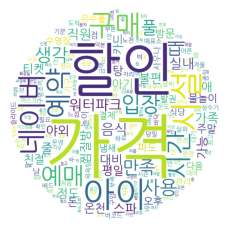

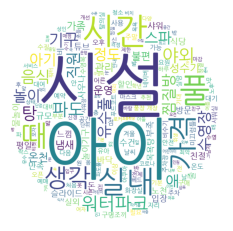

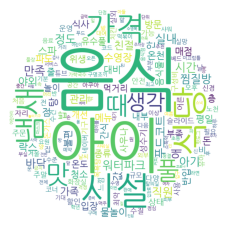

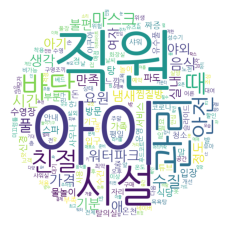

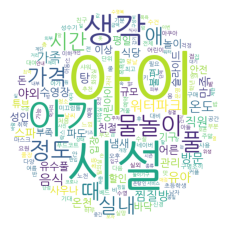

In [13]:
##부정 리뷰 WordCloud
neg_dic={}
kiwi=Kiwi()

for topic in  ['buy', 'installation', 'food', 'service', 'visit_type']:
  neg=[]
  data_word=[]
  for i in range(len(data)):
    data[topic][i]=ast.literal_eval(data[topic][i].replace(' ', ' ,'))
    if data[topic][i][0] <=-1:
      neg.append(data['review'][i])
                 
#토크나이징
  for i in tqdm(range(len(neg))):
    try:
      data_word.append(kiwi.tokenize(neg[i]))
    except Exception as e:
      continue
  #리스트를 요소별로 명사만 추출한 후 리스트로 저장
  morph_list = []
  for i in range(len(data_word)):
    for j in range(len(data_word[i])):
      if data_word[i][j][1] in ['NNG','NNP']:
        #NNG:일반명사, NNP:고유명사, VV:동사, VA:형용사, VX:보조용언, VCP:긍정지시사(이다), VCN:부정지시사(아니다), XR:어근
        morph_list.append(data_word[i][j][0])
  ex_word=['사람','물','이용','곳']
  for word in ex_word:
    while word in morph_list:
      morph_list.remove(word)
  neg_dic[topic]=morph_list
  word_list = Counter(neg_dic[topic])
  word_cloud(word_list)

  0%|          | 0/13784 [00:00<?, ?it/s]

buy


  0%|          | 0/39996 [00:00<?, ?it/s]

installation


  0%|          | 0/5271 [00:00<?, ?it/s]

food


  0%|          | 0/6288 [00:00<?, ?it/s]

service


  0%|          | 0/40069 [00:00<?, ?it/s]

visit_type


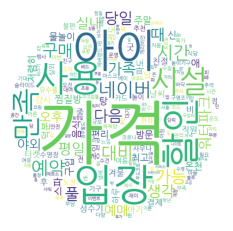

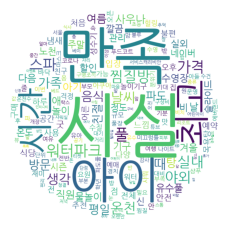

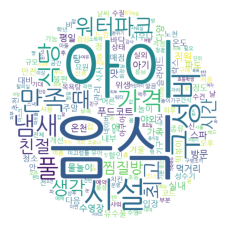

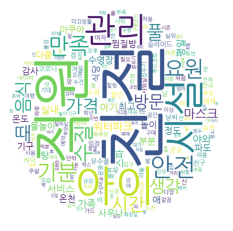

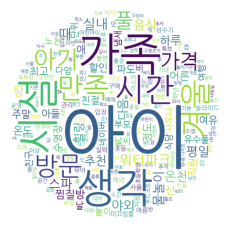

In [14]:
#긍정 리뷰 WordCloud
pos_dic={}

for topic in  ['buy', 'installation', 'food', 'service', 'visit_type']:
  pos=[]
  data_word=[]
  for i in range(len(data)):
    if data[topic][i][0]>=1:
      pos.append(data['review'][i])

  #토크나이징
  data_word=[]
  for i in tqdm(range(len(pos))):
      try:
          data_word.append(kiwi.tokenize(pos[i]))
      except Exception as e:
          continue

  #리스트를 요소별로 명사만 추출한 후 리스트로 저장

  #명사추출
  morph_list = []
  for i in range(len(data_word)):
    nouns=[]
    for j in range(len(data_word[i])):
      if data_word[i][j][1] in ['NNG','NNP']:
        #NNG:일반명사, NNP:고유명사, VV:동사, VA:형용사, VX:보조용언, VCP:긍정지시사(이다), VCN:부정지시사(아니다), XR:어근
        morph_list.append(data_word[i][j][0])
  ex_word=['사람','물','이용','곳']
  for word in ex_word:
    while word in morph_list:
      morph_list.remove(word)
  pos_dic[topic]=morph_list
  word_list = Counter(pos_dic[topic])
  word_cloud(word_list)

# 2.토픽별 긍부정 문장 카운트

In [ ]:
# 긍부정 카운트
for topic in ['buy', 'food', 'installation', 'service', 'visit_type']:
  for pn in ['SUM','POS', 'NEG']:
    num = 0
    str_pn = ''
    if pn == 'POS':
      num = 1
      str_pn = '긍정'
    elif  pn == 'SUM':
      num = 0
      str_pn = '소계'
    else:
      num = 2
      str_pn = '부정'
    tmp = []
    for i in range(len(data)):
      tmp.append(data[topic][i][num])
    
    print(f'토픽 {topic}의 {str_pn}의 점수의 합계는 {sum(tmp)}입니다.')
    globals()[f'{topic}_{pn}'] = tmp

# 3.워터파크 별 점수 확인

In [16]:
groups = data.groupby('name')
waterpark_dict = dict(list(groups))
topic_list = ['buy', 'food', 'installation', 'service', 'visit_type']

In [ ]:
df_waterpark_score = pd.DataFrame(columns = ['buy', 'food', 'installation', 'service', 'visit_type'])

In [18]:
for waterpark in waterpark_dict.keys():
  df_waterpark = waterpark_dict[waterpark]
  df_waterpark.reset_index(inplace = True)
  df_waterpark.drop(columns = ['index'], inplace = True)

  topic_scores = []
  for topic in ['buy', 'food', 'installation', 'service', 'visit_type']:
    pos_cnt, neg_cnt = 0, 0
    for pn in ['POS', 'NEG']:
      num = 0
      if pn == 'POS':
        num = 1
      else:
        num = 2
      tmp = []
      for i in range(len(df_waterpark)):
        tmp.append(data[topic][i][num])

      if pn == 'POS':
        pos_cnt = sum(tmp)
      else:
        neg_cnt = sum(tmp)

    topic_scores.append(pos_cnt / (pos_cnt + neg_cnt))
  df_tmp = pd.DataFrame([topic_scores], columns = topic_list, index = [f'{waterpark}'])
  df_waterpark_score = pd.concat([df_waterpark_score, df_tmp], axis = 0)
  del(df_waterpark)

In [19]:
df_waterpark_score

,buy,food,installation,service,visit_type
SeaLaLa워터파크&찜질방,0.385856,0.252300,0.488442,0.421811,0.663066
강원랜드하이원워터월드,0.398230,0.266614,0.521573,0.413748,0.662400
경주월드캘리포니아비치,0.384205,0.265152,0.489048,0.417962,0.664536
덕구온천리조트스파월드,0.355000,0.242340,0.495247,0.468293,0.656783
디오션워터파크,0.363431,0.246269,0.500000,0.441964,0.661684
뚝섬한강공원수영장,0.352025,0.239852,0.493734,0.441558,0.668299
롯데리조트부여아쿠아가든,0.355685,0.243056,0.501746,0.477273,0.668904
롯데리조트속초워터파크,0.353808,0.240541,0.496262,0.468599,0.656415
롯데워터파크,0.437366,0.288963,0.577102,0.446144,0.698630
롯데워터파크김해,0.360129,0.234848,0.494179,0.442029,0.666245


In [20]:
#한글폰트 깨짐 방지
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

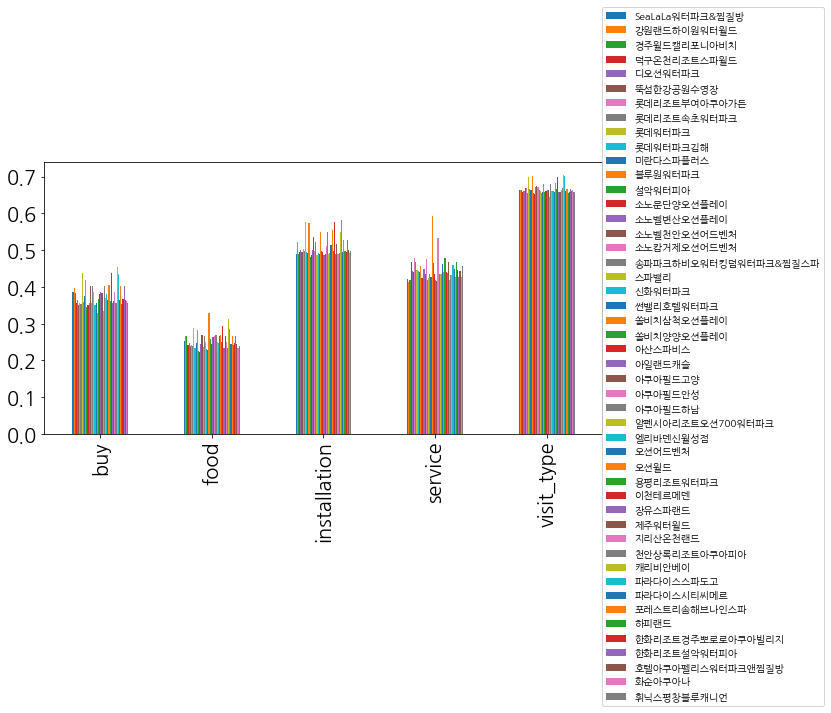

In [102]:
df_waterpark_score.transpose().plot(kind='bar',figsize=(10,5),fontsize=20)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
plt.legend(loc=(1.0, -1.0))
fm._rebuild()
plt.show()

# 4.리뷰 점수 VS 문장내 긍부정 평가

In [ ]:
data['rating_result']=0
for i in range(len(data)):
  for topic in ['buy', 'food', 'installation', 'service', 'visit_type']:
    data['rating_result'][i]+=int(data[topic][i][0])

In [ ]:
#결과값이 긍정인 비율
res_pos=[]
for i in range(5):
  res_pos.append(round(len(data[(data['rating_result']>0) & (data['rating']<(i+1))& (data['rating']>=i)]) /len(data[(data['rating']<(i+1))& (data['rating']>=i)])*100,2))
res_pos.append(round(len(data[(data['rating_result']>0) & (data['rating']==5)])/len(data[data['rating']>=5])*100,2))
res_pos

In [24]:
#결과값이 부정인 비율
res_neg=[]
for i in range(5):
  res_neg.append(round(len(data[(data['rating_result']<0) & (data['rating']<(i+1))& (data['rating']>=i)]) /len(data[(data['rating']<(i+1))& (data['rating']>=i)])*100,2))
res_neg.append(round(len(data[(data['rating_result']<0) & (data['rating']==5)])/len(data[data['rating']>=5])*100,2))
res_neg

[79.57, 63.07, 58.26, 43.4, 21.7, 10.91]

In [ ]:
#결과값이 중립인 비율
res_neu=[]
for i in range(5):
  res_neu.append(round(len(data[(data['rating_result']==0) & (data['rating']<(i+1))& (data['rating']>=i)]) /len(data[(data['rating']<(i+1))& (data['rating']>=i)])*100,2))
res_neu.append(round(len(data[(data['rating_result']==0) & (data['rating']==5)])/len(data[data['rating']>=5])*100,2))
res_neu

##결과 값 데이터프레임으로 병합

In [100]:
df_result = df({'Positive':res_pos,
                'Negative':res_neg,
                'Neutral':res_neu},index=['0점 이상 1점 미만','1점 이상 2점 미만','2점 이상 3점 미만','3점 이상 4점 미만','4점 이상 5점 미만','5점'])
#index=['0-1','1-2','2-3','3-4','4-5','5']

In [101]:
df_result

,Positive,Negative,Neutral
0점 이상 1점 미만,1.90,79.57,18.53
1점 이상 2점 미만,2.76,63.07,34.17
2점 이상 3점 미만,5.58,58.26,36.16
3점 이상 4점 미만,15.13,43.40,41.48
4점 이상 5점 미만,35.97,21.70,42.33
5점,47.62,10.91,41.47


# 5.리뷰 키워드 검색

In [29]:
#리뷰 키워드를 포함한 전체 리뷰 검색
def Key_search_all():
  word_search = input('키워드를 입력해주세요 : ')
  print(data[data['review'].str.contains(word_search)]['review'])

#리뷰 키워드를 포함한 리뷰를 긍정 부정 각 1개씩 검색
def Key_search():
  word_search = input('키워드를 입력해주세요 : ')
  for i in range(len(data)):
    if word_search in data['review'][i] and data['rating_result'][i]>0:
      print('긍정 리뷰 : ',data['review'][i])
      break
  for i in range(len(data)):     
    if word_search in data['review'][i] and data['rating_result'][i]<0:
      print('부정 리뷰 : ',data['review'][i])
      break

In [30]:
Key_search()

키워드를 입력해주세요 : 한국
긍정 리뷰 :  하이원은 슬로프도 길고 한국에서 가장 높고 좋아요 하이원 리조트도 넓고 좋아요 
부정 리뷰 :  메인 풀 수온이 좀 낮았어요 5살 이하 혼욕 금지인데 만 나이인가요 공지가 정확이 되면 도움이 될 것 같습니다 한국 나이 5살이면 아직 로커 번호도 잘 못 읽어서요


# 6.워터파크별 토픽점수 데이터프레임

In [31]:
#컬럼 = 토픽
#인덱스 = 워터파크
#데이터 = 긍부정 카운트 

In [97]:
def Waterpark_analysis():
  waterpark_name = input('워터파크 이름을 입력해주세요: ')
  water_df=df_waterpark_score[df_waterpark_score.index==waterpark_name]
  water_df.transpose().plot(kind='bar',figsize=(10,5),fontsize=20)
  #등급 산정
  df_waterpark_analysis=df(columns=['buy', 'food', 'installation', 'service', 'visit_type'])
  ranking = []
  leveling =[]

  print('\n','*총 워터파크',len(df_waterpark_score.index),'곳 중')
  for topic in ['buy', 'food', 'installation', 'service', 'visit_type']:
    topic_rank=df_waterpark_score.sort_values(topic, ascending=False).index.tolist()
    num_rank=int(topic_rank.index(waterpark_name))+1
    # print(topic,':',num_rank,'위')

    ranking.append(num_rank)
    if num_rank/len(df_waterpark_score.index) <=0.2:
      leveling.append('최상')
    elif num_rank/len(df_waterpark_score.index) >0.2 and num_rank/len(df_waterpark_score.index) <=0.4:
      leveling.append('상')
    elif num_rank/len(df_waterpark_score.index) >0.4 and num_rank/len(df_waterpark_score.index) <=0.6:
      leveling.append('중')
    elif num_rank/len(df_waterpark_score.index) >0.6 and num_rank/len(df_waterpark_score.index) <=0.8:
      leveling.append('하')
    elif num_rank/len(df_waterpark_score.index) >0.8 and num_rank/len(df_waterpark_score.index) <=1.0:
      leveling.append('최하')
  df_waterpark_analysis.loc['워터파크 순위']=ranking
  df_waterpark_analysis.loc['워터파크 등급']=leveling
  display(df_waterpark_analysis)

  print('\n')



워터파크 이름을 입력해주세요: 롯데워터파크

 *총 워터파크 48 곳 중


,buy,food,installation,service,visit_type
워터파크 순위,3,4,2,17,5
워터파크 등급,최상,최상,최상,상,최상


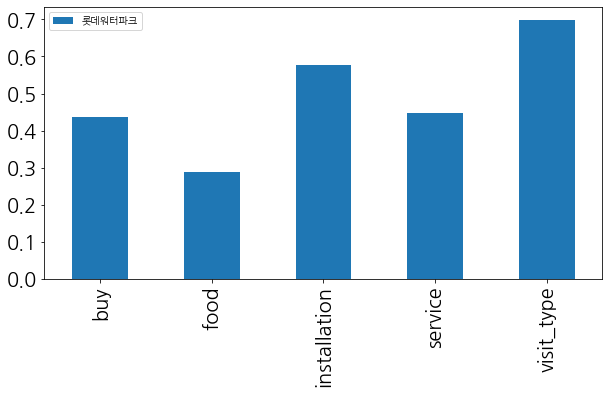

In [98]:
Waterpark_analysis()